In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

In [15]:
path = '/Users/davidmiles-skov/Desktop/Academics/Projects/market-clearing-price/data/test.csv'
df = pd.read_csv(path)
# renaming columns for easier access
mapper={'Quantity (MWh)':'Quantity',  'Price (€/MWh)':'Price'}
df=df.rename(columns=mapper)
df_supply =df[df['Supply/Demand']=='Supply']
df_demand = df[df['Supply/Demand']=='Demand']

Gathering data

In [7]:
supply_price = df[df['Supply/Demand']=='Supply']['Price'].to_numpy()
supply_quantity = df[df['Supply/Demand']=='Supply']['Quantity'].to_numpy()
demand_price = df[df['Supply/Demand']=='Demand']['Price'].to_numpy()
demand_quantity = df[df['Supply/Demand']=='Demand']['Quantity'].to_numpy()

N_G, N_D = len(supply_price), len(demand_price)
N_G, N_D

(15, 12)

Setting up variables for linprog

In [8]:
c = np.append(supply_price,-demand_price)
A_eq = np.array([np.append(np.ones(N_G), -np.ones(N_D))])
b_eq = 0
A = np.identity(N_G+N_D)
b = np.append(supply_quantity,demand_quantity)

linprog

In [9]:
result = linprog(c, A_eq=A_eq, b_eq=b_eq, A_ub=A, b_ub=b)

Checking answer

In [10]:
result

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -94817.5
              x: [ 1.200e+02  5.000e+01 ...  0.000e+00  0.000e+00]
            nit: 1
          lower:  residual: [ 1.200e+02  5.000e+01 ...  0.000e+00
                              0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00 ...  1.350e+01
                              2.150e+01]
          upper:  residual: [       inf        inf ...        inf
                                    inf]
                 marginals: [ 0.000e+00  0.000e+00 ...  0.000e+00
                              0.000e+00]
          eqlin:  residual: [ 0.000e+00]
                 marginals: [ 3.750e+01]
        ineqlin:  residual: [ 0.000e+00  0.000e+00 ...  2.500e+01
                              1.000e+01]
                 marginals: [-3.750e+01 -3.750e+01 ... -0.000e+00
                             -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
  

check lagrange multipliers

In [11]:
result.ineqlin

  residual: [ 0.000e+00  0.000e+00 ...  2.500e+01  1.000e+01]
 marginals: [-3.750e+01 -3.750e+01 ... -0.000e+00 -0.000e+00]

In [12]:
result.eqlin

  residual: [ 0.000e+00]
 marginals: [ 3.750e+01]

In [14]:
df.columns[0]

'Company'

Visualising proportion of Supply and Demand reached for respect producers and consumers

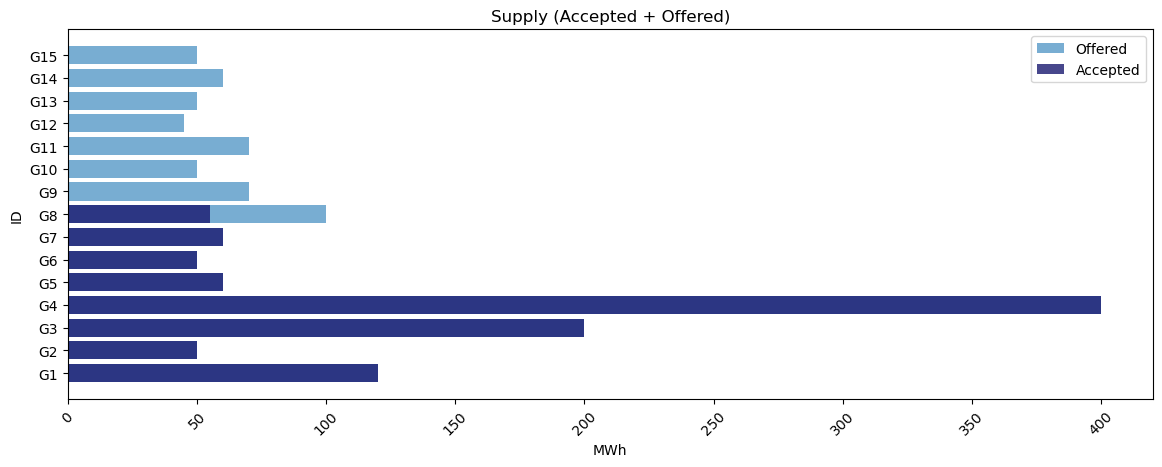

----- Percentage of offer accepted ----
['G1' 'G2' 'G3' 'G4' 'G5' 'G6' 'G7' 'G8' 'G9' 'G10' 'G11' 'G12' 'G13'
 'G14' 'G15']
[100. 100. 100. 100. 100. 100. 100.  55.   0.   0.   0.   0.   0.   0.
   0.]


In [37]:
labels_producers = df_supply['ID'] 
labels_consumers = df_demand['ID']

actual_producers = result.x[:N_G]
actual_consumers = result.x[N_G::]

offer_producers = supply_quantity
offer_consumers = demand_quantity

y_pos_producers = np.arange(len(labels_producers))
y_pos_consumers = np.arange(len(labels_consumers))

# Plotting producers
fig, ax = plt.subplots()
# make figure wider
fig.set_figwidth(14)
ax.barh(y_pos_producers, offer_producers, alpha=0.6, label='Offered')

# Going over, IDs again, indicating actual amount of electricity supplied

ax.barh(y_pos_producers, actual_producers, alpha=0.8, color='midnightblue', label='Accepted')

ax.set_yticks(y_pos_producers)
ax.set_yticklabels(labels_producers, fontsize=10)
ax.set_xlabel('MWh')
ax.set_ylabel('ID')
ax.set_title("Supply (Accepted + Offered)")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()
print("----- Percentage of offer accepted ----")
print(labels_producers.to_numpy())
print(f"{100*actual_producers/offer_producers}")

doing the same for consumers

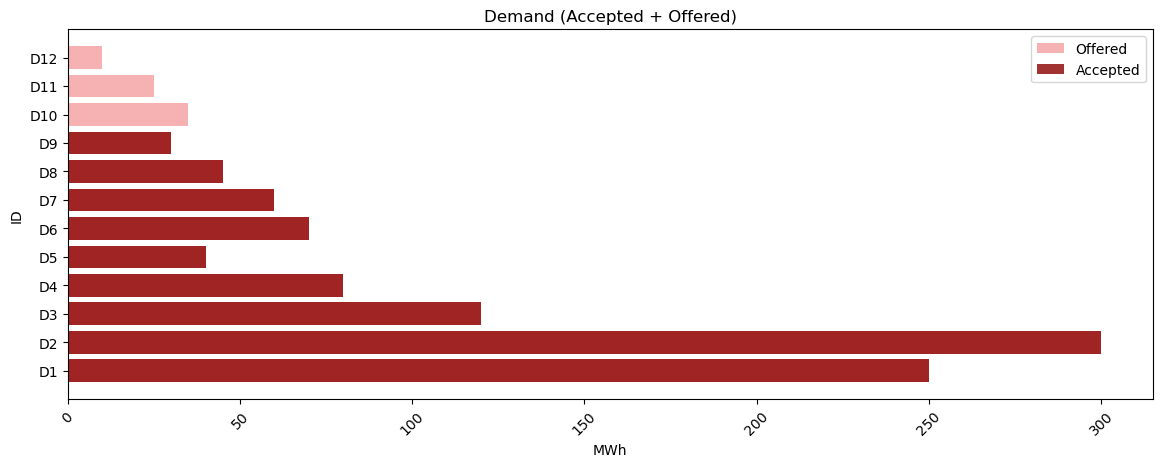

----- Percentage of offer accepted ----
['D1' 'D2' 'D3' 'D4' 'D5' 'D6' 'D7' 'D8' 'D9' 'D10' 'D11' 'D12']
[100. 100. 100. 100. 100. 100. 100. 100. 100.   0.   0.   0.]


In [38]:
fig, ax = plt.subplots()
# make figure wider
fig.set_figwidth(14)
ax.barh(y_pos_consumers, offer_consumers, alpha=0.6, color='lightcoral', label='Offered')

# Going over, IDs again, indicating actual amount of electricity supplied

ax.barh(y_pos_consumers, actual_consumers, alpha=0.8, color='darkred', label='Accepted')

ax.set_yticks(y_pos_consumers)
ax.set_yticklabels(labels_consumers, fontsize=10)
ax.set_xlabel('MWh')
ax.set_ylabel('ID')
ax.set_title("Demand (Accepted + Offered)")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()
print("----- Percentage of offer accepted ----")
print(labels_consumers.to_numpy())
print(f"{100*actual_consumers/offer_consumers}")